In [18]:
'''
__author__ = 'Alex Cheng'
惩罚回归系数控制过拟合-岭回归（L2）
让系数变小，而不是将其中一些系数设定为0
alpha一系列值按照10的倍数递减，通过不同值来控制模型数量
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets,linear_model
from sklearn.metrics import roc_curve,auc

In [7]:
target_url = ("http://archive.ics.uci.edu/ml/machine-learning-databases/"
             "undocumented/connectionist-bench/sonar/sonar.all-data")
df = pd.read_csv(target_url,header=None,sep=",",prefix='V')
df.head()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [8]:
print(df.iloc[:,-1].value_counts()) # M:111, R:97
labels = []
for label in df.iloc[:,-1]: # 二分类值转换为实数
    if(label == 'M'):
        labels.append(1.0)
    else:
        labels.append(0.0)

        
# 将属性矩阵和标签向量2/3训练，1/3测试
indices = len(df)
xTrain = np.array(df[df.index % 3 != 0].iloc[:,:-1]) # dataframe转为numpy数组
#yTrain = np.array(df[df.index % 3 != 0].iloc[:,-1])
yTrain = [labels[i] for i in df.index if i%3 !=0]
xTest =  np.array(df[df.index % 3 == 0].iloc[:,:-1])
yTest = [labels[i] for i in df.index if i%3 ==0]

M    111
R     97
Name: V60, dtype: int64


In [15]:
alphaList=[0.1 ** i for i in [-3,-2,-1,0,1,2,3,4,5]]
print(alphaList)

[999.9999999999999, 99.99999999999999, 10.0, 1.0, 0.1, 0.010000000000000002, 0.0010000000000000002, 0.00010000000000000002, 1.0000000000000003e-05]


In [20]:
aucList = []
for alph in alphaList:
    ridgeModel = linear_model.Ridge(alpha=alph)
    ridgeModel.fit(xTrain,yTrain)
    fpr,tpr,thresholds = roc_curve(yTest,ridgeModel.predict(xTest)) #受测试者曲线
    roc_auc = auc(fpr,tpr) # 面积
    aucList.append(roc_auc)

for i in range(len(aucList)):
    print(aucList[i],alphaList[i])
    

0.8411138411138411 999.9999999999999
0.864045864045864 99.99999999999999
0.9074529074529074 10.0
0.9180999180999181 1.0
0.8828828828828829 0.1
0.8615888615888616 0.010000000000000002
0.8517608517608517 0.0010000000000000002
0.8509418509418509 0.00010000000000000002
0.8493038493038493 1.0000000000000003e-05


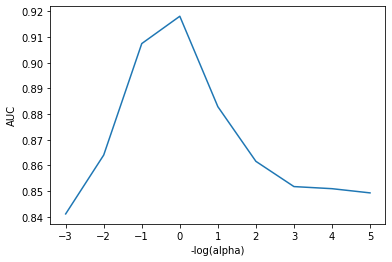

In [21]:
# plot auc vs alpha
x = [-3,-2,-1,0,1,2,3,4,5]
plt.plot(x,aucList)
plt.xlabel('-log(alpha)')
plt.ylabel('AUC')
plt.show()

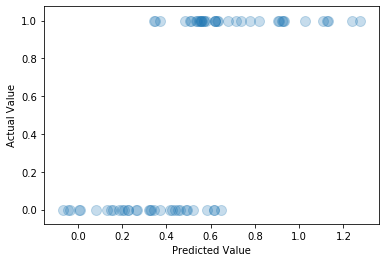

In [24]:
# 可视化最佳分类器
indexBest = aucList.index(max(aucList)) # AUC取最大值
alph = alphaList[indexBest]
ridgeModel = linear_model.Ridge(alpha=alph)
ridgeModel.fit(xTrain,yTrain)

# scatter plot of actual vs predicted
plt.scatter(ridgeModel.predict(xTest),yTest,s=100,alpha=0.25)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()
